In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
#!pip install xgboost
import xgboost
from dateutil.relativedelta import relativedelta
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

root_path = 'gdrive/MyDrive/Colab Notebooks/'
path = Path(root_path)
filename = 'b2.csv'

df_final = pd.read_csv(path/filename)
df_final


,date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Wind speed
0,01-Jan-2019 - 00:00,151.12,515.67,56.88,54.95,75.44,74.42,18.54,2.51,27.43,0.64
1,02-Jan-2019 - 00:00,257.21,625.60,58.90,73.14,86.91,81.71,21.16,3.00,31.07,0.84
2,03-Jan-2019 - 00:00,141.07,515.14,22.73,44.50,42.12,75.25,16.18,2.02,17.08,0.97
3,04-Jan-2019 - 00:00,222.49,383.30,18.52,36.10,34.29,53.20,15.61,1.88,12.88,0.80
4,05-Jan-2019 - 00:00,309.92,494.91,18.40,58.23,45.92,49.80,15.43,2.10,3.63,1.33
...,...,...,...,...,...,...,...,...,...,...,...
1030,27-Oct-2021 - 00:00,141.25,263.39,4.08,14.89,18.97,23.05,6.38,0.95,32.05,NaN
1031,28-Oct-2021 - 00:00,159.74,249.57,12.04,21.00,33.03,25.43,5.69,1.06,30.13,NaN
1032,29-Oct-2021 - 00:00,167.33,291.64,12.62,18.65,31.23,26.74,9.16,1.14,23.92,NaN
1033,30-Oct-2021 - 00:00,142.75,263.71,7.41,17.36,24.78,26.53,5.89,0.95,21.86,NaN


In [9]:
df_final = df_final.mask(df_final.eq('None')).dropna()
df_final['PM10'] = df_final['PM10'].astype(float)
df_final['NO'] = df_final['NO'].astype(float)
df_final['NO2'] = df_final['NO2'].astype(float)
df_final['CO'] = df_final['CO'].astype(float)
df_final['NOx'] = df_final['NOx'].astype(float)
df_final['SO2'] = df_final['SO2'].astype(float)
df_final['NH3'] = df_final['NH3'].astype(float)
df_final['PM2.5'] = df_final['PM2.5'].astype(float)
df_final['Ozone'] = df_final['Ozone'].astype(float)
df_final['Wind speed'] = df_final['Wind speed'].astype(float)

df_final.drop(columns=['date'],inplace=True)

#df_final['date'] = pd.to_datetime(df_final['date'])
df_final

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Wind speed
0,151.12,515.670,56.88,54.950,75.44,74.420,18.54,2.510,27.43,0.64
1,257.21,625.600,58.90,73.140,86.91,81.710,21.16,3.000,31.07,0.84
2,141.07,515.140,22.73,44.500,42.12,75.250,16.18,2.020,17.08,0.97
3,222.49,383.300,18.52,36.100,34.29,53.200,15.61,1.880,12.88,0.80
4,309.92,494.910,18.40,58.230,45.92,49.800,15.43,2.100,3.63,1.33
...,...,...,...,...,...,...,...,...,...,...
359,205.68,307.190,7.13,40.780,27.52,46.290,4.61,1.180,25.97,1.01
360,266.96,409.660,18.25,41.670,37.03,40.840,5.78,1.170,24.03,0.73
361,277.67,413.380,37.71,40.100,52.05,31.440,6.47,1.760,11.99,0.61
363,334.53,481.000,26.42,55.960,51.30,66.830,5.26,2.130,4.42,0.90


In [10]:
print(df_final.dtypes)

PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
SO2           float64
CO            float64
Ozone         float64
Wind speed    float64
dtype: object


In [11]:
df_final.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Wind speed'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X= df_final.iloc[:,:-1]
y= df_final.iloc[:,-1]
trainX, testX, trainy, testy = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=1)
#random_state=123 shuffle=False

In [13]:
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.009, max_depth=6)
#model = xgboost.XGBRegressor(objective='reg:linear', n_estimators=500, learning_rate=0.006, max_depth=2)
model.fit(trainX,trainy)
pred = model.predict(testX)
MAE= mean_absolute_error(testy, pred)
MSE= mean_squared_error(testy, pred)
RMSE = np.sqrt(mean_squared_error(testy, pred))
print("Mean Absolute Error: %f" % (MAE))
print("Root Mean Square Error: %f" % (RMSE))

Mean Absolute Error: 0.206599
Root Mean Square Error: 0.277205


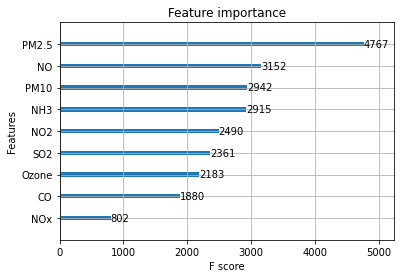

In [14]:
xgboost.plot_importance(model._Booster)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

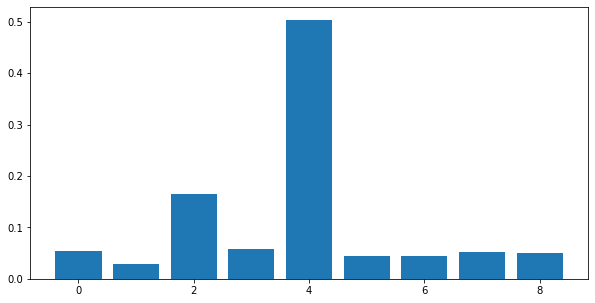

In [15]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [16]:
# feature importance
print(model.feature_importances_)

[0.05408351 0.02927221 0.16562298 0.05805118 0.503468   0.04376765
 0.044871   0.05162149 0.04924196]
